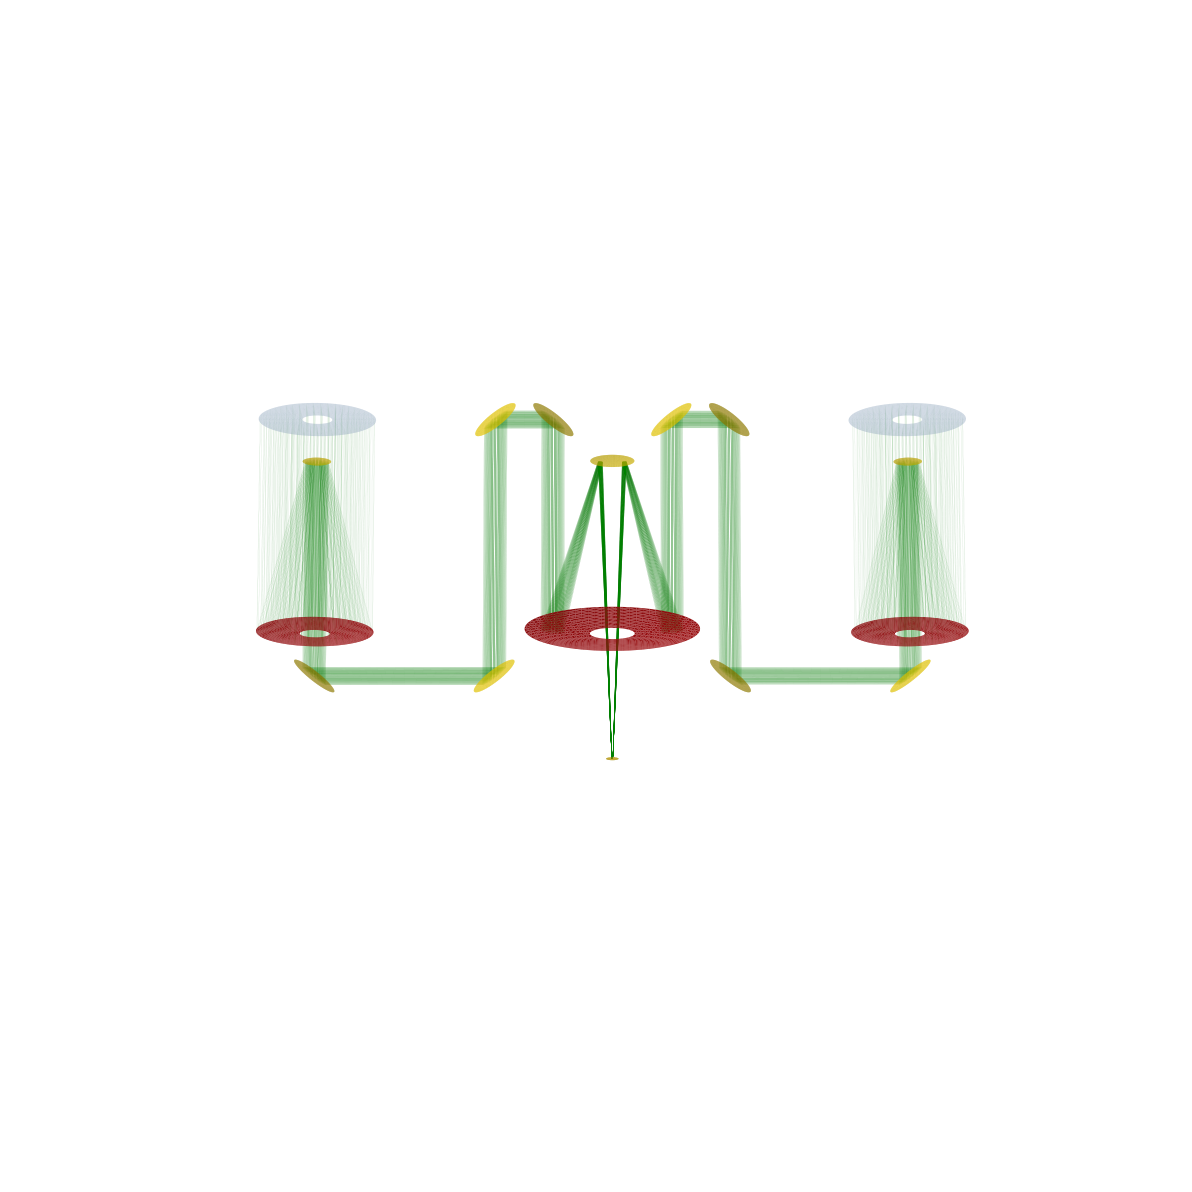

([<matplotlib.tri.triangulation.Triangulation at 0x1666fee90>,
 [array([0., 0., 0., ..., 0., 0., 0.]),
  array([-4.99986981, -4.99986981, -4.99986981, ..., -4.9370504 ,
         -4.9370504 , -4.9370504 ]),
  array([-0.99996136, -0.99996136, -0.99996136, ..., -0.98131745,
         -0.98131745, -0.98131745]),
  array([-5.98696489, -5.9621012 , -5.9621012 , ..., -6.35551278,
         -6.3591073 , -6.36090876]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([-4.99986981, -4.99986981, -4.99986981, ..., -4.9370504 ,
         -4.9370504 , -4.9370504 ]),
  array([-0.99996136, -0.99996136, -0.99996136, ..., -0.98131745,
         -0.98131745, -0.98131745]),
  array([-5.98696489, -5.9621012 , -5.9621012 , ..., -6.35551278,
         -6.3591073 , -6.36090876]),
  array([-5.9621012 , -5.98696489, -5.98696489, ..., -5.59355332,
         -5.5899588 , -5.58815733]),
  array([-5.98696489, -5.9621012 , -5.9621012 , ..., -6.35551278,
         -6.3591073 , -6.36090876]),
  array([-4.99970921, -4.99970921

In [14]:
import pimms.optics as op
reload(op)
sim=op.SIM(init_b=10., detector_a=.15)
s=op.LightSource((np.pi,np.deg2rad(0.),1e5))
s.num_crosshairs=6
p,q=s(sim.get_entrance(), 500, 1, sampling='dizzle')
trace,seq=sim.trace(q)
#fig=plt.figure(figsize=(30,30))
#ax=fig.add_subplot(111,projection='3d')
sim.draw(draw_virtual=True,raytrace=trace,view_angles=(-15,-90))

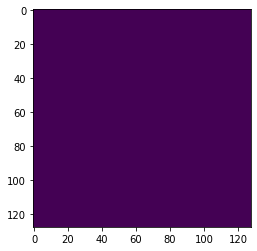

In [27]:
det=sim.get_detectors()[0]
det.photon_buffer=np.empty((0,),dtype=op.sptype)
for i in range(4):
    p,q=s(sim.get_entrance(), 10000, 1., sampling='dizzle')
    trace,seq=sim.trace(q,steps=10)
plt.imshow(det.readout(clear_buffer=False)[0])

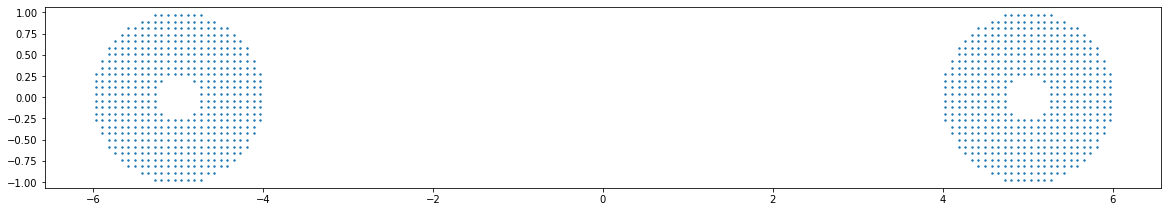

In [12]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)
ax.scatter(p['position'][:p.size,0],p['position'][:p.size,1], s=2)
ax.set_aspect('equal')

In [90]:
reload(op)
sim=op.SIM()
src=op.LightSource((0.,0.,np.inf))
opn=op.OpticalPathNetwork(sim)
p,q=src(sim.get_entrance(),10000,1,sampling='crosshair')
%time pt0,mt0=sim.trace(q)
%time pt1,mt1=sim.trace_network(q,opn)
print(np.allclose(pt0['position'],pt1['position']))

CPU times: user 43.2 s, sys: 15.7 s, total: 58.9 s
Wall time: 51.9 s
CPU times: user 8.96 s, sys: 3.29 s, total: 12.3 s
Wall time: 10.8 s
True
